## 經驗模態分 Empirical Mode Decomposition EMD 

In [1]:
import math
import numpy as np 
import pylab as pl
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy import fftpack  
import scipy.signal as signal
from scipy import interpolate

In [2]:
# 判定當前的時間序列是否是單調序列
def ismonotonic(x):
    max_peaks=signal.argrelextrema(x,np.greater)[0]
    min_peaks=signal.argrelextrema(x,np.less)[0]
    all_num=len(max_peaks)+len(min_peaks)
    if all_num>0:
        return False
    else:
        return True

In [3]:
# 尋找當前時間序列的極值點
def findpeaks(x):
    return signal.argrelextrema(x, np.greater)[0]

# 判斷當前的序列是否為 IMF 序列
def isImf(x):
    N=np.size(x)
    pass_zero=np.sum(x[0:N-2]*x[1:N-1]<0)#过零点的个数
    peaks_num=np.size(findpeaks(x))+np.size(findpeaks(-x))#极值点的个数
    if abs(pass_zero-peaks_num)>1:
        return False
    else:
        return True

In [4]:
# 獲取當前樣條曲線
def getspline(x):
    N = np.size(x)
    peaks=findpeaks(x)
    print("當前極值點個數：",len(peaks))
    if(len(peaks)<=3):
        if(len(peaks)<2):
            peaks=np.concatenate(([0],peaks))
            peaks=np.concatenate((peaks,[N-1]))# 這裡是為了防止樣條次數不夠，無法插值的情況
        t=interpolate.splrep(peaks,y=x[peaks], w=None, xb=None, xe=None,k=len(peaks)-1)
        return interpolate.splev(np.arange(N),t)
    t=interpolate.splrep(peaks,y=x[peaks])
    return interpolate.splev(np.arange(N),t)

In [6]:
# 經驗模態分解方法
def emd(x):
    imf=[]
    while not ismonotonic(x):
        x1=x
        sd=np.inf
        while sd>0.1 or  (not isImf(x1)):
            print(isImf(x1))
            s1=getspline(x1)
            s2=-getspline(-1*x1)
            x2=x1-(s1+s2)/2
            sd=np.sum((x1-x2)**2)/np.sum(x1**2)
            x1=x2
        
        imf.append(x1)
        x=x-x1
    imf.append(x)
    return imf

No handles with labels found to put in legend.


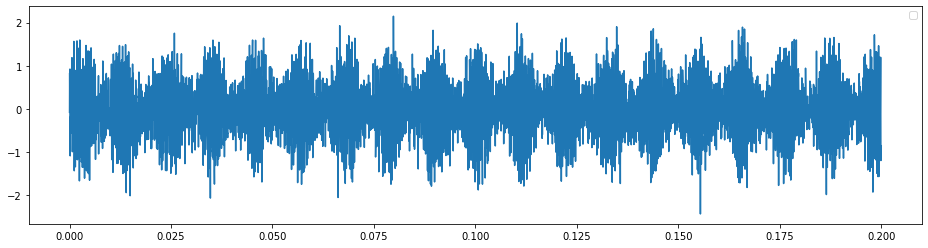

In [7]:
def wgn(x, snr):
    snr = 10**(snr/10.0)
    xpower = np.sum(x**2)/len(x)
    npower = xpower / snr
    return np.random.randn(len(x)) * np.sqrt(npower)

sampling_rate=30000
f0=92
fg=4000
fft_size = 512
t=np.arange(0, 0.2, 1.0/sampling_rate)
x1=0.6*(1+np.sin(2*np.pi*f0*t))*np.sin(2*np.pi*fg*t)
x1+=wgn(x1, 3)
plt.figure(figsize=(16,4))
plt.plot(t,x1)
plt.legend()
plt.show()

In [8]:
imf1=emd(x1)

False
當前極值點個數： 1545
當前極值點個數： 1545
False
當前極值點個數： 1623
當前極值點個數： 1623
False
當前極值點個數： 1670
當前極值點個數： 1670
False
當前極值點個數： 1694
當前極值點個數： 1694
False
當前極值點個數： 1724
當前極值點個數： 1724
False
當前極值點個數： 1742
當前極值點個數： 1742
False
當前極值點個數： 1757
當前極值點個數： 1757
False
當前極值點個數： 1771
當前極值點個數： 1770
False
當前極值點個數： 1780
當前極值點個數： 1779
False
當前極值點個數： 1784
當前極值點個數： 1783
False
當前極值點個數： 1791
當前極值點個數： 1791
False
當前極值點個數： 1797
當前極值點個數： 1796
False
當前極值點個數： 1801
當前極值點個數： 1801
False
當前極值點個數： 1813
當前極值點個數： 1812
False
當前極值點個數： 1818
當前極值點個數： 1818
False
當前極值點個數： 1823
當前極值點個數： 1824
False
當前極值點個數： 1824
當前極值點個數： 1825
False
當前極值點個數： 1827
當前極值點個數： 1828
False
當前極值點個數： 1830
當前極值點個數： 1831
False
當前極值點個數： 1831
當前極值點個數： 1832
False
當前極值點個數： 828
當前極值點個數： 827
False
當前極值點個數： 831
當前極值點個數： 830
False
當前極值點個數： 835
當前極值點個數： 834
False
當前極值點個數： 366
當前極值點個數： 367
False
當前極值點個數： 376
當前極值點個數： 377
False
當前極值點個數： 380
當前極值點個數： 381
False
當前極值點個數： 381
當前極值點個數： 381
False
當前極值點個數： 383
當前極值點個數： 383
False
當前極值點個數： 385
當前極值點個數： 385
False
當前極值點個數： 386
當前極值點個數： 386


In [9]:
len(imf1)

10

No handles with labels found to put in legend.


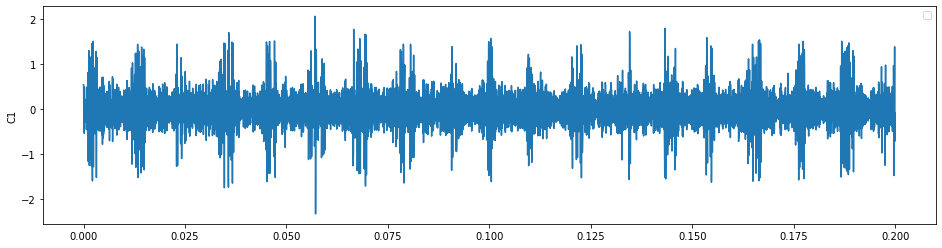

In [10]:
plt.figure(figsize=(16,4))
plt.plot(t,imf1[0])
# plt.plot(t,imf1[0],'*')
plt.ylabel("C1")
# plt.xlim(0,0.005)
plt.legend()
plt.show()

No handles with labels found to put in legend.


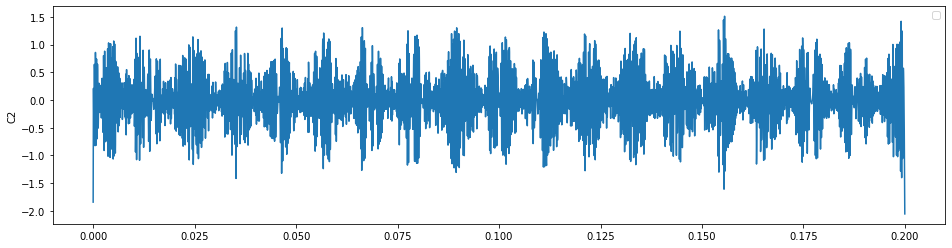

In [11]:
plt.figure(figsize=(16,4))
plt.plot(t,imf1[1])
plt.ylabel("C2")
plt.legend()
plt.show()

No handles with labels found to put in legend.


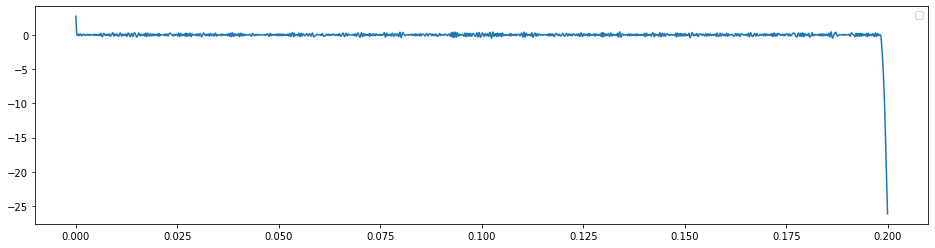

In [12]:
plt.figure(figsize=(16,4))
plt.plot(t,imf1[2])
# plt.plot(t,imf1[2],'o')


# plt.ylabel("C3")

# plt.xlim(0,0.01)
plt.legend()
plt.show()

No handles with labels found to put in legend.


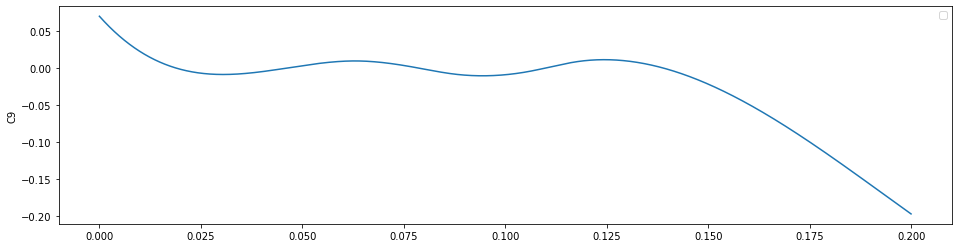

In [13]:
plt.figure(figsize=(16,4))
plt.plot(t,imf1[8])
plt.ylabel("C9")
plt.legend()
plt.show()

No handles with labels found to put in legend.


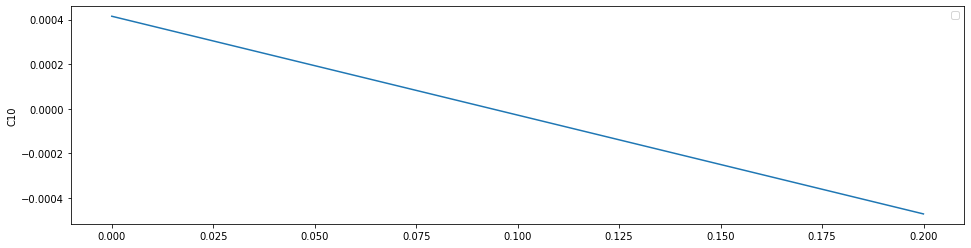

In [15]:
plt.figure(figsize=(16,4))
plt.plot(t,imf1[9])
plt.ylabel("C10")
plt.legend()
plt.show()